## Renewable Energy by the World's Leaders in Journal Articles on the Subject

There are three datasets:

* Energy Indicators: this is a list of indicators of 2013 energy supply and renewable energy production from the United Nations
* GDP data from the World Bank: GDP data from 1960 to 2015
* Sciamgo: [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102); this is a ranking of countries based on their academic journal contributions in the field

The purpose of this notebook is exploratory, and moreso a practice merging DataFrames from different sources into a central location. 

_This exercise is adapted from University of Michigan's Introduction to Data Science in Python_.

In [102]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#suppress scientific notation of large numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [103]:
#load datasets
energy = pd.read_excel('data/Energy Indicators.xls', skiprows=18,skip_footer=38, parse_cols='C:F', header=None, names=['Country','Energy Supply','Energy Supply per Capita','% Renewable'], na_values='...')
GDP = pd.read_csv('data/world_bank.csv', skiprows=4)
ScimEn = pd.read_excel('data/scimagojr-3.xlsx')

#cleaning energy dataset
energy['Energy Supply'] *= 1000000 #converting to gigajoules
countries = energy['Country'].tolist()
alpha_countries = [''.join([i for i in s if not i.isdigit()]) for s in countries] #cleaning country names
energy['Country'] = alpha_countries

#renaming some countries to match other datasets
energy['Country'].replace({
    'United States of America': 'United States', 
    'Republic of Korea': 'South Korea', 
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'China, Hong Kong Special Administrative Region': 'Hong Kong',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Falkland Islands (Malvinas)':'Falkland Islands',
    'Iran (Islamic Republic of)':'Iran',
    'Micronesia (Federated States of)':'Micronesia',
    'Sint Maarten (Dutch part)': 'Sint Maarten',
    'Venezuela (Bolivarian Republic of)':'Venezuela'},inplace=True)
energy = energy.set_index('Country')

#replacing country names in the GDP dataset to match
GDP['Country Name'].replace({
    'Korea, Rep.': 'South Korea',
    'Iran, Islamic Rep.': 'Iran',
    'Hong Kong SAR, China': 'Hong Kong'}, inplace=True)

#taking a look at only the most recent World Bank data
GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].set_index('Country Name')

#setting the last dataset's index to country
ScimEn = ScimEn.set_index('Country')

In [104]:
#merge datasets into a single DataFrame
dfmerge1 = pd.merge(ScimEn,GDP,how='inner',left_index=True,right_index=True)
dfmerge2 = pd.merge(dfmerge1,energy,how='inner',left_index=True,right_index=True)

#keep only the top 15 countries in terms of Sciamgo Journal country ranks
top_countries = dfmerge2[dfmerge2['Rank'] < 16]
top_countries.sort_values(by='Rank')

top_countries.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable
Australia,14,8831,8725,90765,15606,10.28,107,1021939264106.67,1060340245233.55,1099643871866.03,1119653852349.08,1142250506474.06,1169431057881.91,1211913217353.49,1241484494446.53,1272519759757.29,1301251030445.66,5386000000.00,231.00,11.81
Brazil,15,8668,8596,60702,14396,7.00,86,1845079664513.56,1957118136056.33,2056809174052.93,2054214562458.19,2208872214643.02,2295244758549.53,2339209222185.09,2409739667075.82,2412230647720.45,2319423390494.13,12149000000.00,59.00,69.65
Canada,6,17899,17620,215003,40930,12.01,149,1564468853329.45,1596739898466.32,1612713061250.24,1565144676082.31,1613406134731.12,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81,10431000000.00,296.00,61.95
China,1,127050,126767,597237,411683,4.70,138,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28,127191000000.00,93.00,19.75
France,9,13153,12973,130632,28601,9.93,114,2607839735099.34,2669423841059.60,2674637086092.71,2595966887417.22,2646994701986.75,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58,10597000000.00,166.00,17.02


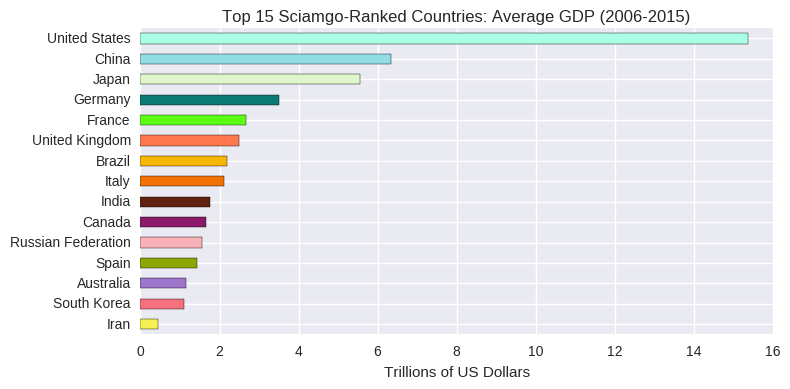

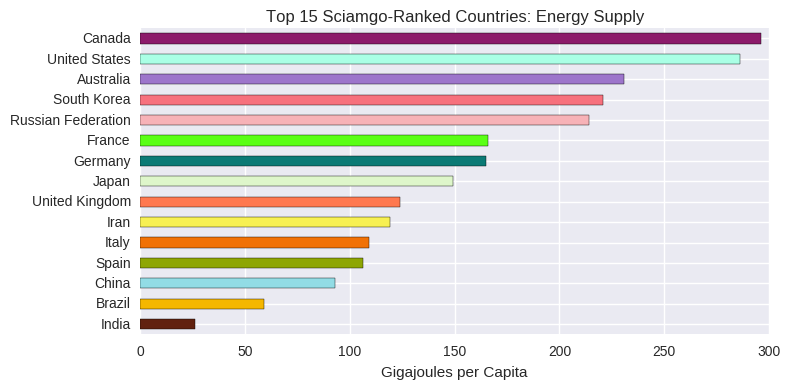

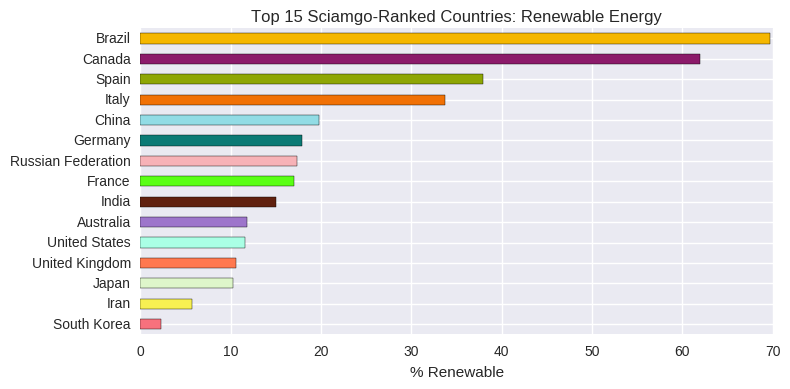

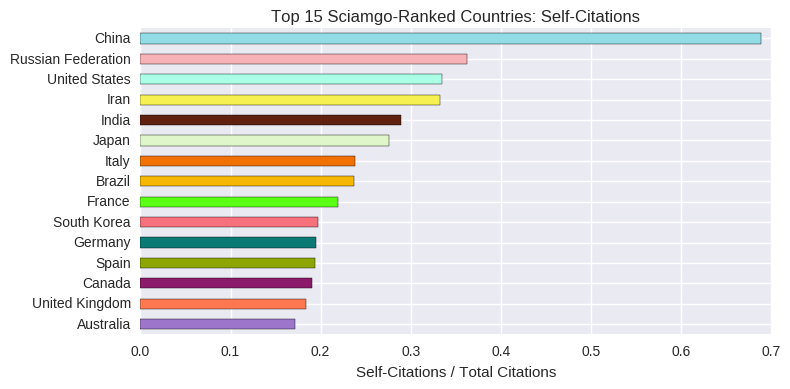

In [225]:
# Plotting some of the data we have
color_dict = {'Canada':'#8c1a6a', 'United States': '#aaffe5', 'Australia': '#9d75cb',
              'South Korea': '#f7717d', 'Russian Federation': '#f7b2b7', 'France': '#5aff15', 'Germany': '#0b7a75',
              'Japan': '#def6ca', 'United Kingdom': '#ff784f', 'Iran': '#f7f052', 'Italy': '#f17105',
              'Spain': '#8ea604', 'China': '#92dce5', 'Brazil': '#f5b700', 'India': '#61210f'
}

avgGDP = top_countries[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1,skipna=True)
avgGDP['Trillions'] = avgGDP/1000000000000
citation_ratio = (top_countries['Self-citations'] / top_countries['Citations'])

x = [avgGDP['Trillions'], top_countries['Energy Supply per Capita'], top_countries['% Renewable'], citation_ratio]
titles = ['Average GDP (2006-2015)', 'Energy Supply', 'Renewable Energy', 'Self-Citations']
xlabels = ['Trillions of US Dollars', 'Gigajoules per Capita', '% Renewable', 'Self-Citations / Total Citations']

loop = 0

for i in x:
    data = i.sort_values()
    color_list = [color_dict.get(i) for i in data.index]
    data.plot(kind='barh', color=color_list, figsize=(8,4))
    plt.title('Top 15 Sciamgo-Ranked Countries: {}'.format(titles[loop]))
    plt.xlabel(xlabels[loop])
    plt.tight_layout()
    plt.show()
    loop += 1
    

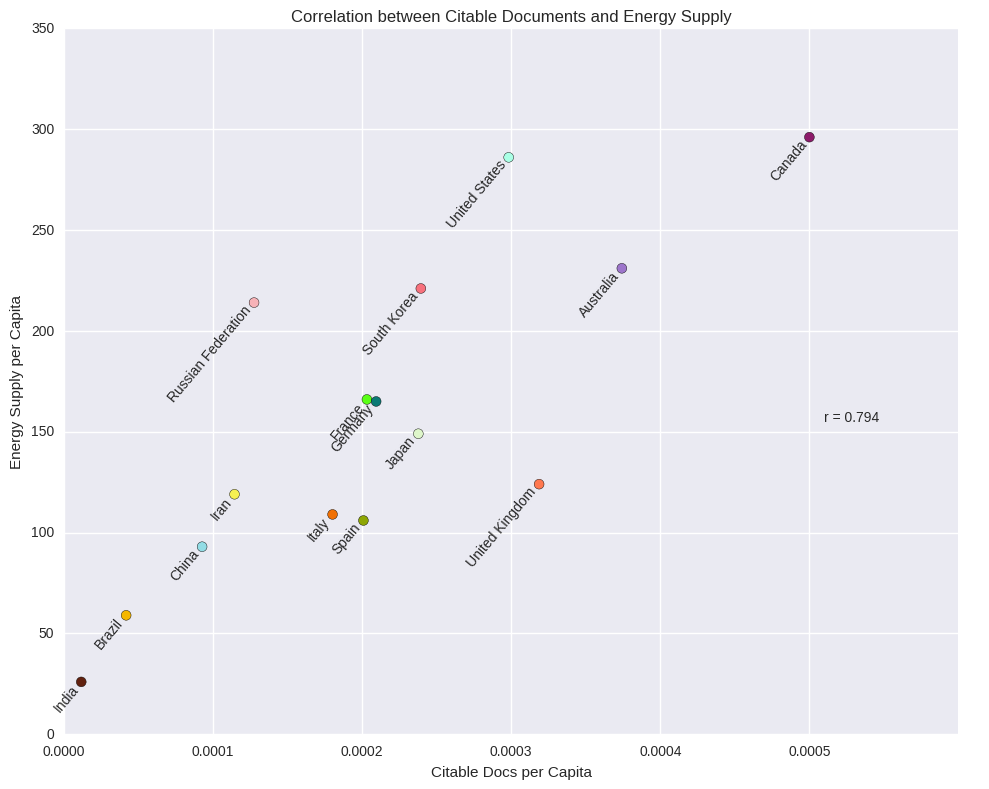

In [226]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
copy = top_countries.copy()

copy['PopEst'] = (top_countries['Energy Supply'] / top_countries['Energy Supply per Capita'])
copy['Citable Docs per Capita'] = (top_countries['Citable documents'] / copy['PopEst'])

correlation = copy[['Citable Docs per Capita','Energy Supply per Capita']].corr().iloc[1,0]
color_list = [color_dict.get(i) for i in copy.index]

copy.plot(x='Citable Docs per Capita', y='Energy Supply per Capita', s=50, c=color_list, kind='scatter', xlim=[0, 0.0006], figsize=(10,8))
plt.title('Correlation between Citable Documents and Energy Supply')
plt.tight_layout()

for i, txt in enumerate(copy.index):
    plt.annotate(txt, (copy['Citable Docs per Capita'][i], copy['Energy Supply per Capita'][i]), ha='right',va='top', rotation=50)
    
plt.annotate('r = {0:.3f}'.format(correlation), (.00051, 155))
plt.show()

In [229]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    

# an aside to check out a grouped and binned view of the % Renewable    
copy['Bins'] = pd.cut(copy['% Renewable'], 5)
copy['Continent'] = pd.Series(ContinentDict, index=copy.index)
groups = copy.groupby((copy['Continent'], copy['Bins'])).agg({'% Renewable': 'count'})

bins_by_cont = pd.Series(data=groups['% Renewable'], index=(groups.index))
bins_by_cont

Continent      Bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: % Renewable, dtype: int64

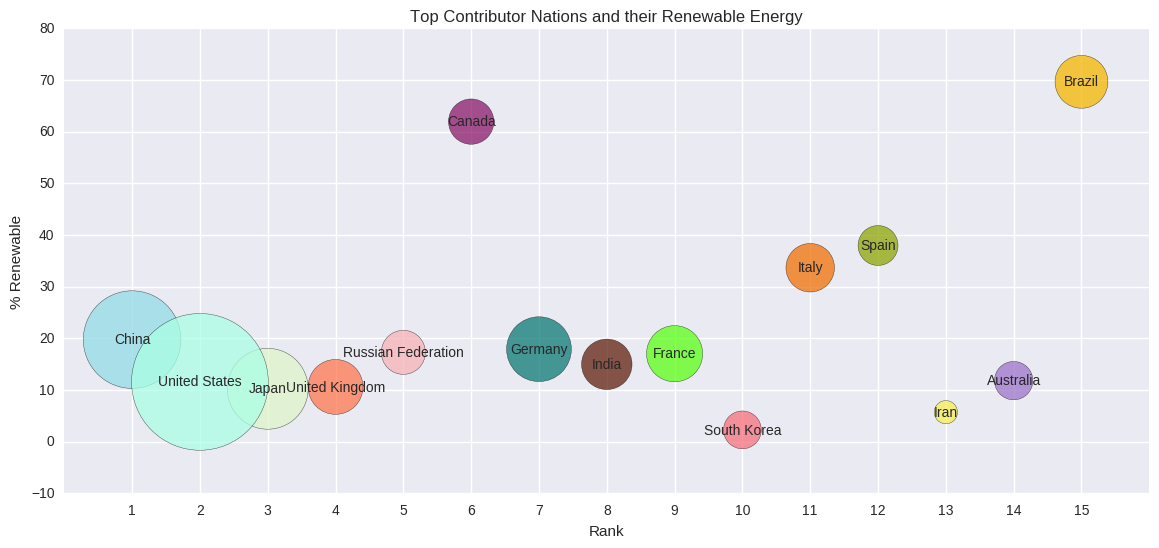

In [228]:
color_list = [color_dict.get(i) for i in copy.index]

copy.plot(x='Rank', y='% Renewable', kind='scatter', c=color_list, xticks=range(1,16), s=6*copy['2014']/10**10, alpha=.75, figsize=(14,6))
plt.title('Top Contributor Nations and their Renewable Energy')
for i, txt in enumerate(copy.index):
        plt.annotate(txt, [copy['Rank'][i], copy['% Renewable'][i]], ha='center', va='center')
